In [1]:
%pylab inline
import seaborn
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-05-22 22:10:15,156] INFO in core: Started 


2020-04-17


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
M1,21.0,0.113876,0.160801,-0.198594,-0.165673,0.140698,0.343948,0.387788,0.658431,1.909216,1.633853,-0.292107
S&P 500,21.0,0.249377,0.505571,-0.623851,-0.428319,0.174579,0.997927,1.064715,0.477435,3.070049,4.744629,0.066907
CSI 300,21.0,0.119906,0.568871,-0.691244,-0.613134,0.079245,1.157561,1.504266,0.196716,-0.370646,5.284259,0.851630
IRA,21.0,0.094395,0.629771,-1.491101,-0.635281,0.238479,1.050735,1.166557,0.137185,0.417402,7.143630,-0.500579


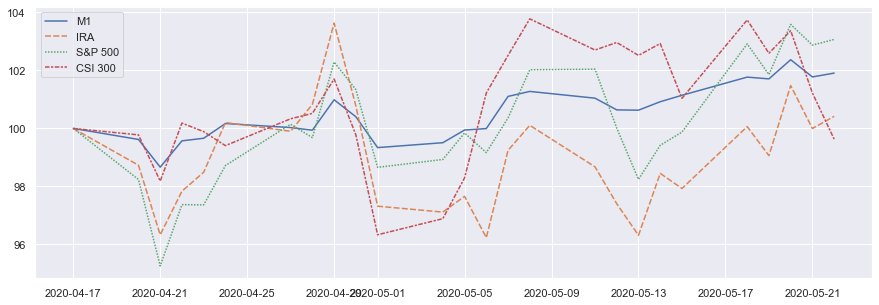

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

2019-11-14


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
IRA,118.0,0.038671,1.914536,-7.145022,-4.072378,0.309034,1.904982,5.842451,0.016020,1.315904,46.663521,-1.362111
CSI 300,118.0,0.006881,0.837838,-3.009172,-1.748399,0.219349,0.930281,1.504266,-0.001335,-3.077920,20.174870,-1.409874
S&P 500,118.0,-0.035945,1.058732,-3.782368,-2.453970,0.157998,1.465666,3.152724,-0.041508,-4.916462,33.717264,-0.883266
M1,118.0,-0.056195,0.737727,-3.100054,-1.840194,0.136679,0.686578,1.420288,-0.087017,-7.301380,23.204706,-2.100914


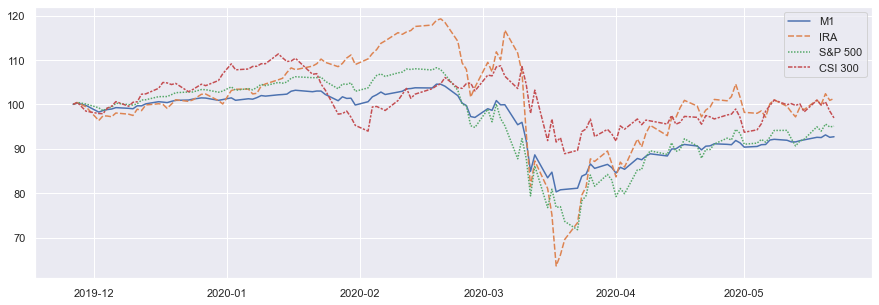

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

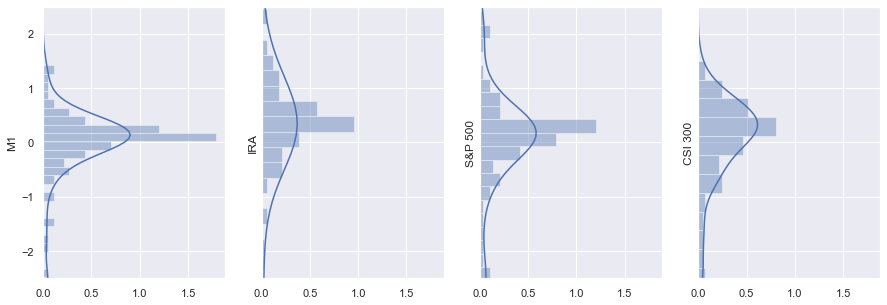

In [4]:
ret = frame.rolling(5).mean().pct_change() * 100
_, axes = plt.subplots(1, len(ret.columns), sharex=True, sharey=True)
for i, col in enumerate((ret.columns)):
    seaborn.distplot(ret[col], ax=axes[i], vertical=True)
_ = plt.setp(axes, ylim=[-2.5, +2.5])